# Lab 4 - Mateusz Markiewicz (298653)

## 1

Generate the design matrix $X_{500 \times 100}$ according to the formula:

$F_{500 \times 3}: \quad \text{for i} \in \{1, \cdots , 3\} \, F_{. i} \sim N(0, I_{500 \times 500})$

$W_{100 \times 3}: \quad W_{.j} = (4 − j)N(0, I_{100 \times 100})$

$E_{500 \times 100}: \quad E_{ij} \sim N(0, 1)$

$X = FW^T + E$


Perform PCA yourself using

a) Eigenvalue decomposition of $X^T X$

b) Using singular value decomposition of $X$


Compare the results. Calculate the correlation coefficients between your estimated PCs and the columns of the F matrix. Estimate the variance of the noise $\sigma^2$

Select the method for PCA and repeat this simulation 100 times for the setup as above (with n = 500) and for the setup with n = 2000. Draw the boxplots of correlations and of the MSE of your estimator of $\sigma$.

In [1]:
n <- 500;
p <- 100;
k <- 3;

In [2]:
F <- matrix(rnorm(n*k,0,1),n,k);
W <- t(t(matrix(rnorm(p*k,0,1),p,k)) * ((k+1)-(1:k)));
E <- matrix(rnorm(n*p,0,1),n,p);

In [3]:
X <- F %*% t(W) + E;

### Eigenvalue decomposition

We can calculate the PCs using eigenvalue decomposition:

In [4]:
eig <- eigen(t(X) %*% X)

In [5]:
F_eig <- X %*% eig$vectors[,1:k]

The correlation coefficients between estimated PCs and the columns of the F matrix:

In [6]:
diag(cor(F,F_eig))

[1] -0.9742785  0.9808233  0.9913921

There are two methods to calculate $\hat{\sigma}^2$. We can estimate $\hat{X}$ and the calculate $\hat{\sigma}^2 = \frac{\text{sum} ((X-\hat{X})^2)}{n(p-k)}$

In [7]:
X_hat <- F_eig %*% t(eig$vectors[,1:k])

In [8]:
ss_hat <- sum((X-X_hat)**2) / ((p-k)*n)
ss_hat

[1] 0.986639

or calculate $\hat{\sigma}^2 = \frac{\sum_{i=k+1}^{p}\lambda_i}{n(p-k)}$

In [9]:
ss_hat2 <- sum(eig$values[(k+1):p]) / ((p-k)*n)
ss_hat2

[1] 0.986639

### Singular value decomposition

The sacond method of computing PCs is based on SVD

In [10]:
svd_res <- svd(X);

In [11]:
F_svd <- svd_res$u[,1:k] %*% diag(svd_res$d[1:k])

The correlation coefficients between estimated PCs and the columns of the F matrix:

In [12]:
diag(cor(F, F_svd))

[1] 0.9742785 0.9808233 0.9913921

In [13]:
M_hat <- F_svd %*% t(svd_res$v[,1:k])

Estimation of the $\hat{\sigma}^2$

In [14]:
sum((X - M_hat)**2)/(n*(p-k))

[1] 0.986639

### 100 replications

In [16]:
reps <- 100;

In [17]:
correlations <- matrix(rep(0, k*reps), reps, k);
sigma_est_error <- rep(0,reps);

In [18]:
for (i in 1:reps){
    E <- matrix(rnorm(n*p,0,1),n,p);
    X <- F %*% t(W) + E;
    eig <- eigen(t(X) %*% X);
    F_eig <- X %*% eig$vectors[,1:k];
    correlations[i, ] <- abs(diag(cor(F,F_eig)));
    ss_hat <- sum(eig$values[(k+1):p]) / ((p-k)*n);
    sigma_est_error[i] <- (ss_hat-1)**2;
}

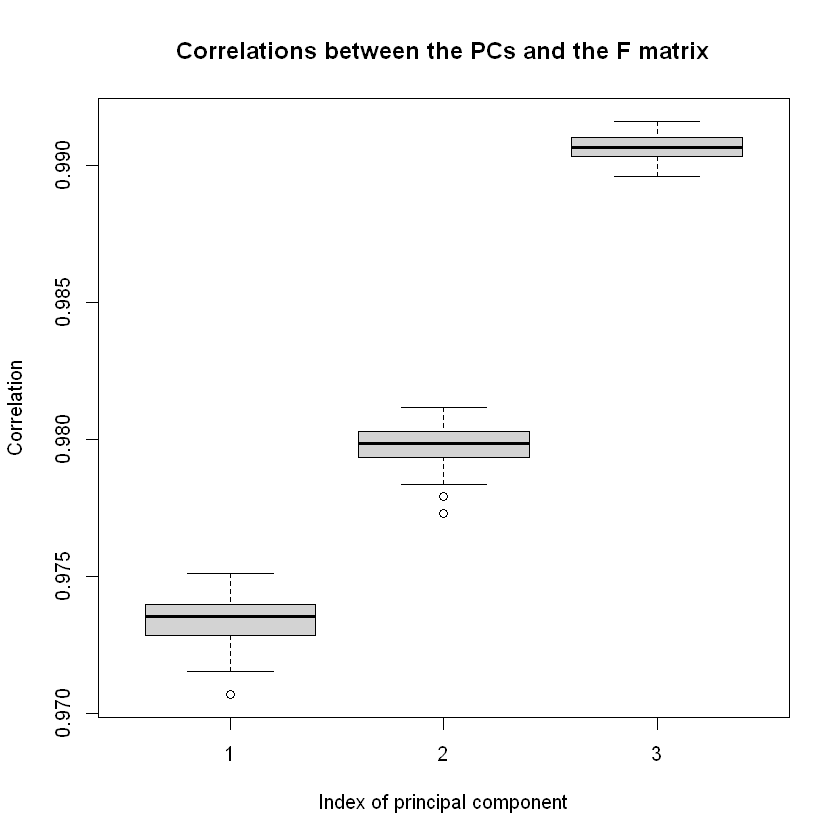

In [19]:
boxplot(correlations,
       main = "Correlations between the PCs and the F matrix",
       ylab = 'Correlation',
       xlab = "Index of principal component")

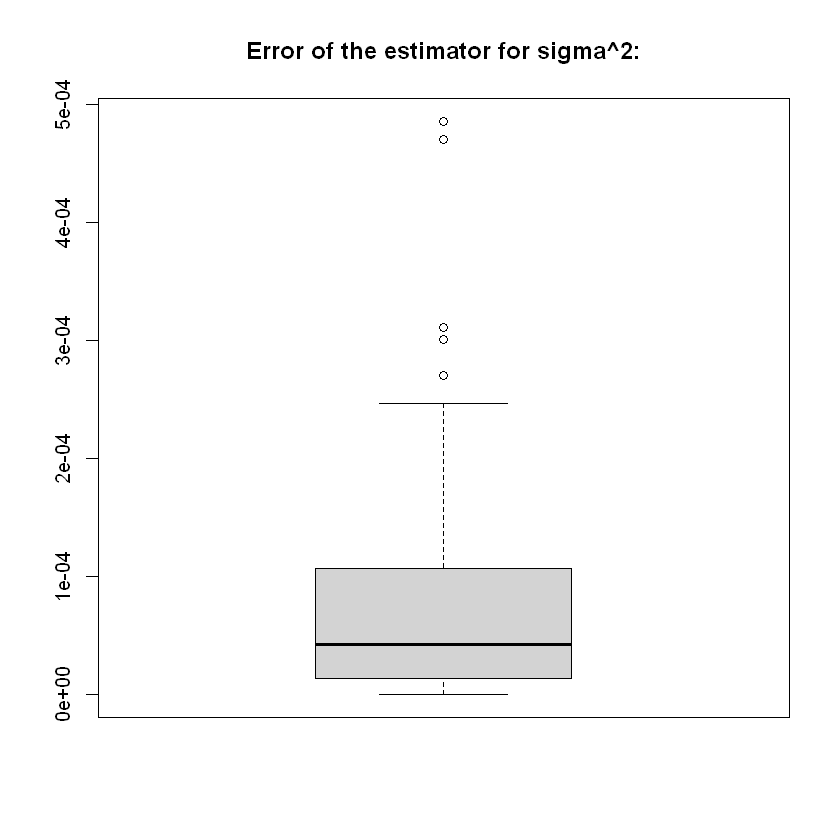

In [20]:
boxplot(sigma_est_error, main = "Error of the estimator for sigma^2:")

In [21]:
print("MSE of the estimator for sigma^2:")
print(mean(sigma_est_error))

[1] "MSE of the estimator for sigma^2:"
[1] 7.860861e-05


In [22]:
n <- 2000;

In [23]:
F <- matrix(rnorm(n*k,0,1),n,k);
W <- t(t(matrix(rnorm(p*k,0,1),p,k)) * ((k+1)-(1:k)));

In [24]:
correlations_2 <- matrix(rep(0, k*reps), reps, k);
sigma_est_error_2 <- rep(0,reps);

In [25]:
for (i in 1:reps){
    E <- matrix(rnorm(n*p,0,1),n,p);
    X <- F %*% t(W) + E;
    eig <- eigen(t(X) %*% X);
    F_eig <- X %*% eig$vectors[,1:k];
    correlations_2[i, ] <- abs(diag(cor(F,F_eig)));
    ss_hat <- sum(eig$values[(k+1):p]) / ((p-k)*n);
    sigma_est_error_2[i] <- (ss_hat-1)**2;
}

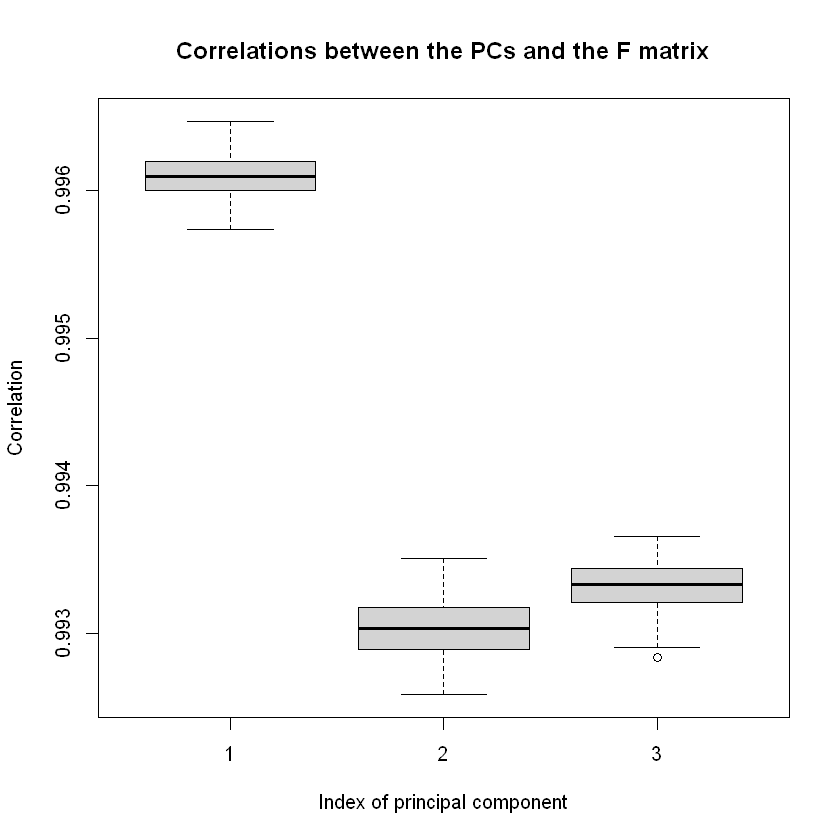

In [26]:
boxplot(correlations_2,
       main = "Correlations between the PCs and the F matrix",
       ylab = 'Correlation',
       xlab = "Index of principal component")

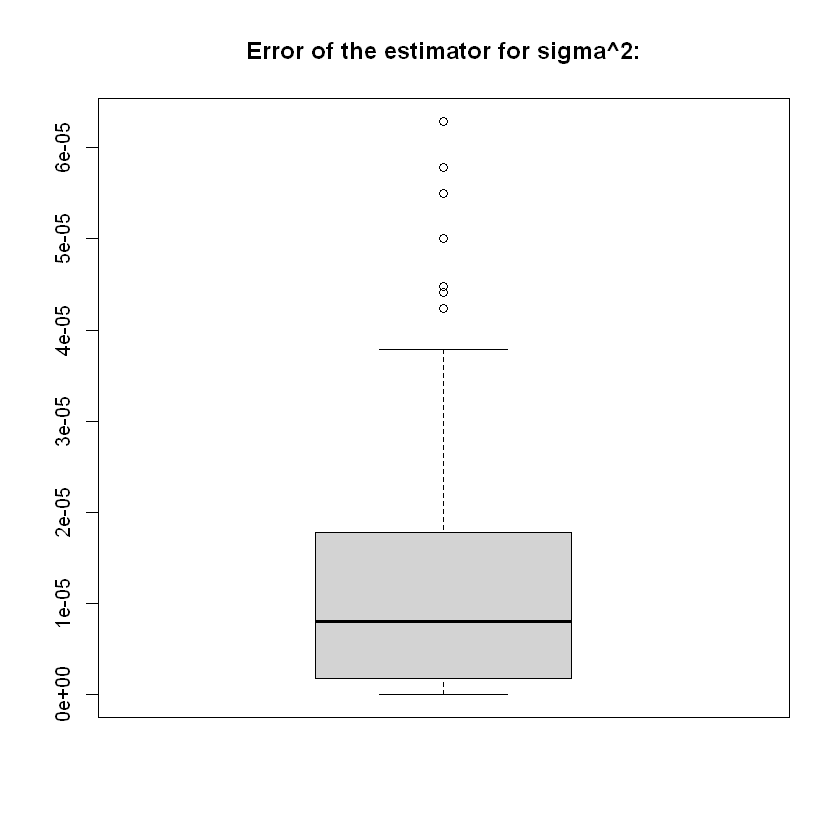

In [27]:
boxplot(sigma_est_error_2, main = "Error of the estimator for sigma^2:")

In [28]:
print("MSE of the estimator for sigma^2:")
print(mean(sigma_est_error_2))

[1] "MSE of the estimator for sigma^2:"
[1] 1.254048e-05


The absolute values of the correlation coefficients are high, and their variance is low. On the plots, we can see that values of the correlation coefficients may differ in respect to principal components, but the relation between them is not constant. Sometimes the first component has the smallest correlation coefficients, sometimes has the highest.
MSE of the $\hat{\sigma}^2$ estimation is small, around $1e^{-5}$.

## 2. 
For $n = 50$ and $p \in \{100, 500, 1000, 5000\}$ generate 100 independent replicates of the design matrix $X_{n \times p}$ according to the formula:

$F_{n \times 5} : \quad \text{for} \, i \in \{1, \cdots , 5\} \, F_{.i} \sim N(0, I_{n \times n})$

$W_{p \times 5} : \quad W_{.j} = (6 − j) N(0, I_{p \times p})$

$E_{n \times p} : \quad E_{ij} \sim N(0, \sigma = 10)$

$X = FW^T + E$

For each combination of n and p draw a histogram of the dimension selected by PESEL.

In [29]:
library(pesel);

In [30]:
n <- 50;
p_arr <- c(100,500,1000,5000);
k <- 5;

In [31]:
reps <- 100;

In [32]:
nPCs <- matrix(rep(0, reps*length(p_arr)), reps, length(p_arr));

In [33]:
for (j in 1:length(p_arr)){
    p <- p_arr[j];
    F <- matrix(rnorm(n*k,0,1),n,k);
    W <- t(t(matrix(rnorm(p*k,0,1),p,k)) * ((k+1)-(1:k)));
    for (i in 1:reps){
        E <- matrix(rnorm(n*p,0,10),n,p);
        X <- F %*% t(W) + E;
        wyn <- pesel(X);
        nPCs[i,j] <- wyn$nPCs;
    }
}

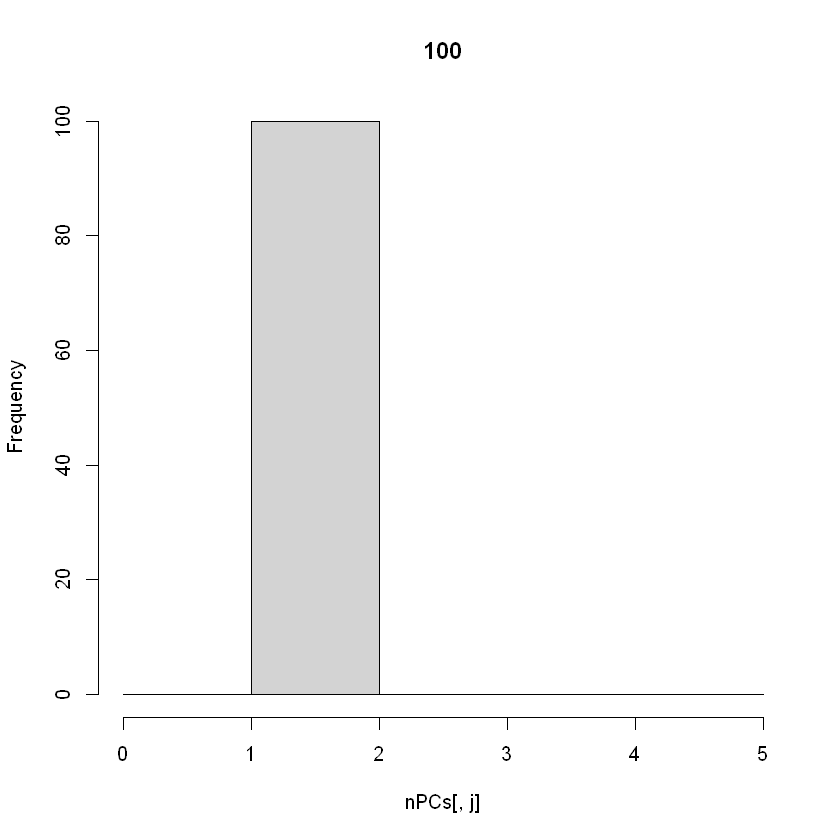

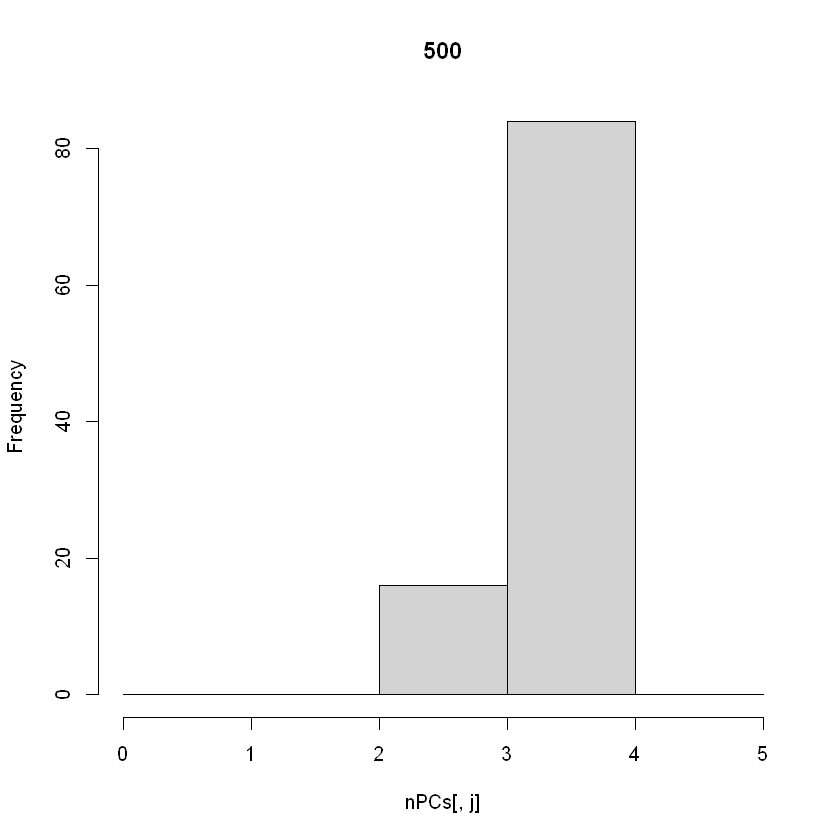

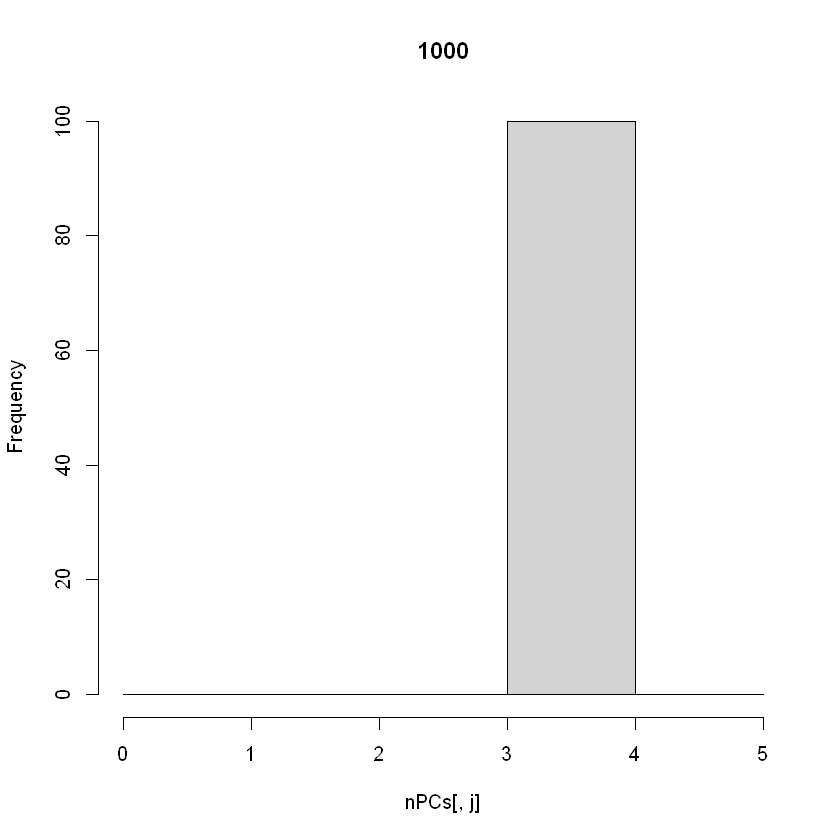

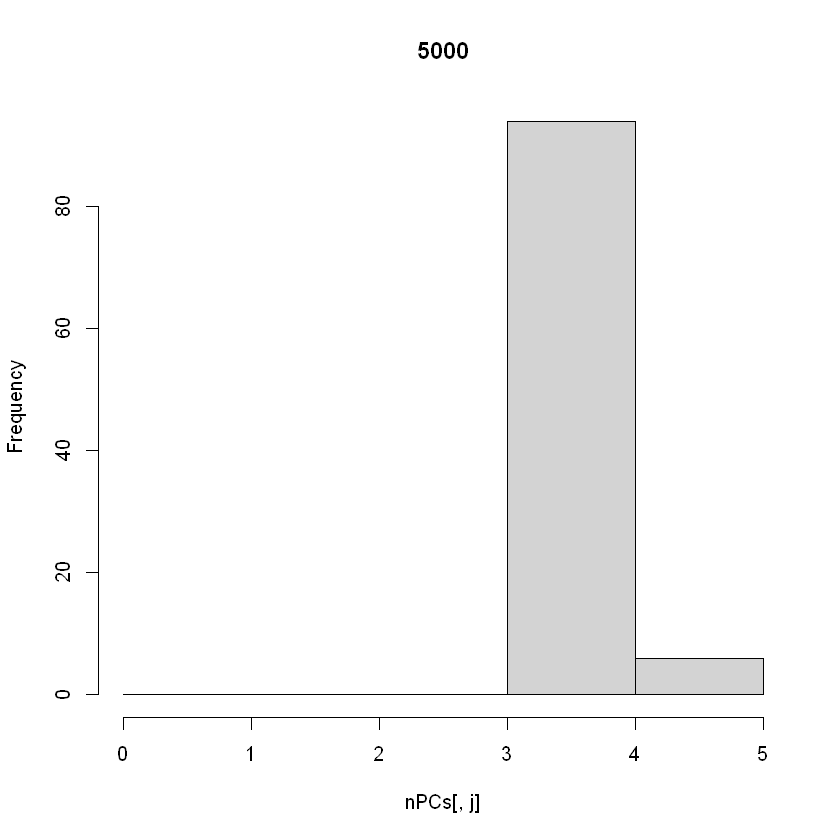

In [34]:
for (j in 1:length(p_arr)){
    hist(nPCs[,j], main = p_arr[j], breaks=c(0,1,2,3,4,5))
}

As expected, a higher $p$ leads to an increase in the number of selected PCs. For $p=100$ we're always selecting only 2 PCs out of 5, for $p=5000$ we're usually selecting 4, but sometimes all 5 PCs.

## 3. 
Repeat task 2 when the elements of E are generated as

1) iid variables from the exponential distribution with the rate parameter $\lambda = 0.1$

2) iid variables from the Cauchy distribution

### Exponential distribution

In [37]:
n <- 50;
p_arr <- c(100,500,1000,5000);
k <- 5;

In [38]:
reps <- 100;

In [39]:
nPCs <- matrix(rep(0, reps*length(p_arr)), reps, length(p_arr));

In [40]:
for (j in 1:length(p_arr)){
    p <- p_arr[j];
    F <- matrix(rnorm(n*k,0,1),n,k);
    W <- t(t(matrix(rnorm(p*k,0,1),p,k)) * ((k+1)-(1:k)));
    for (i in 1:reps){
        E <- matrix(rexp(n*p,0.1),n,p);
        X <- F %*% t(W) + E;
        wyn <- pesel(X);
        nPCs[i,j] <- wyn$nPCs;
    }
}

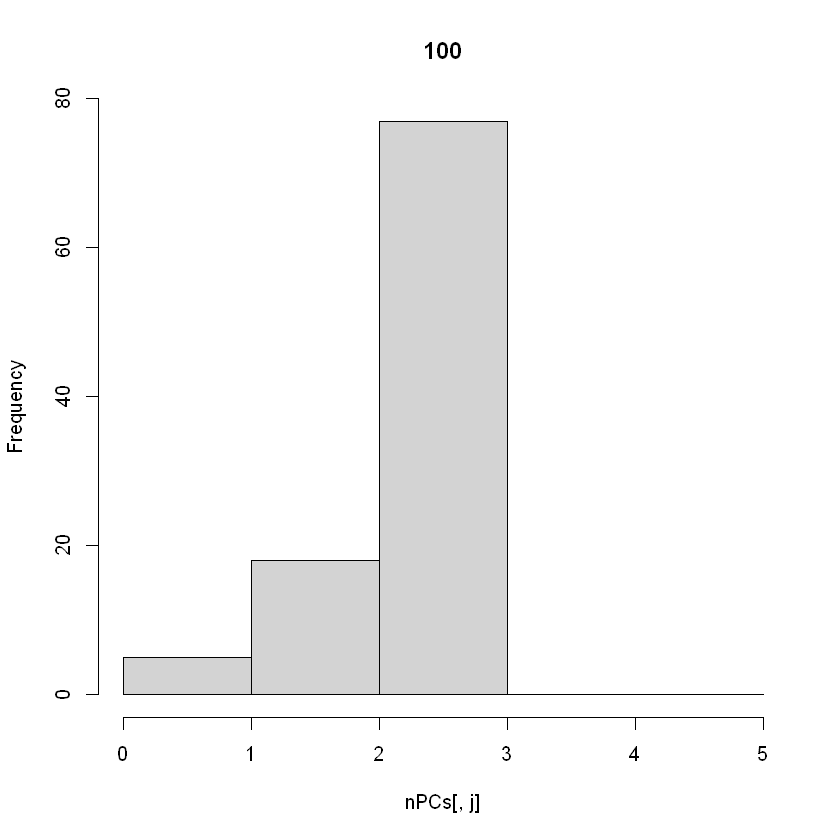

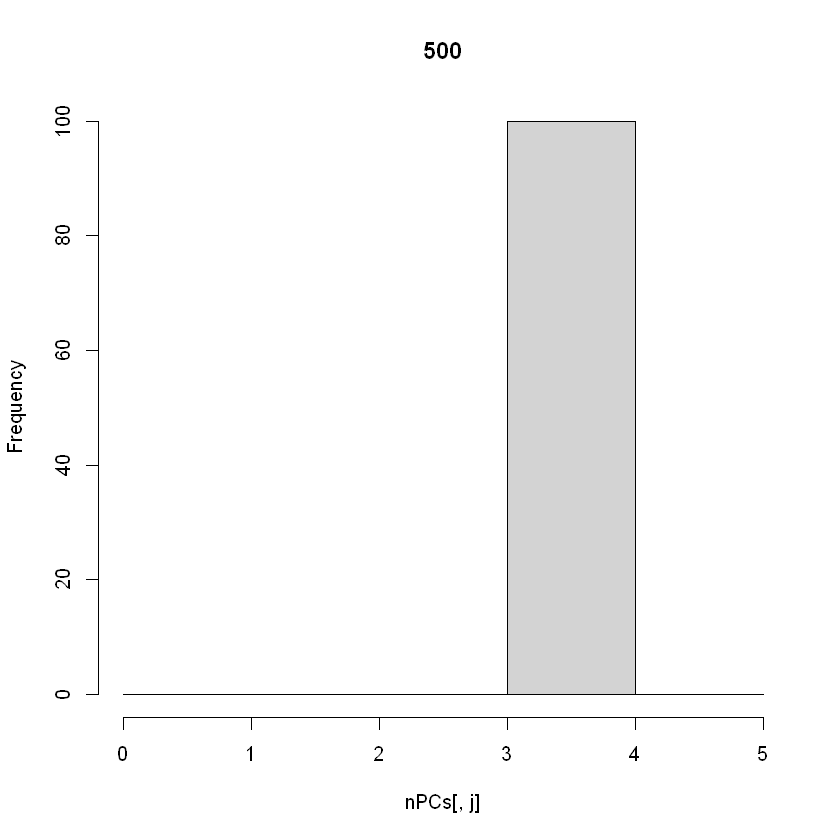

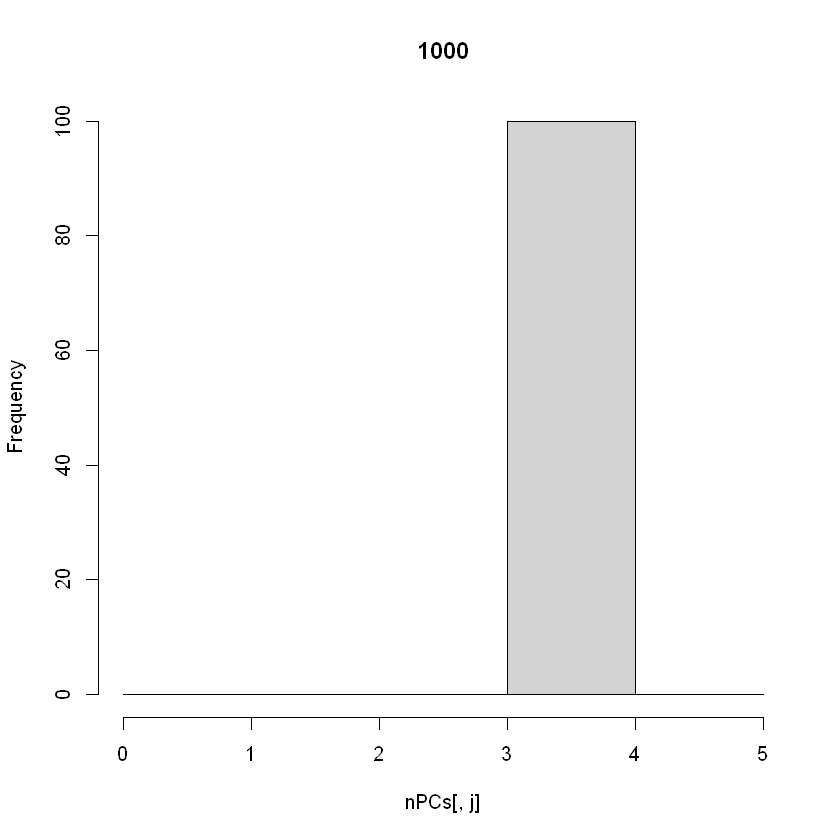

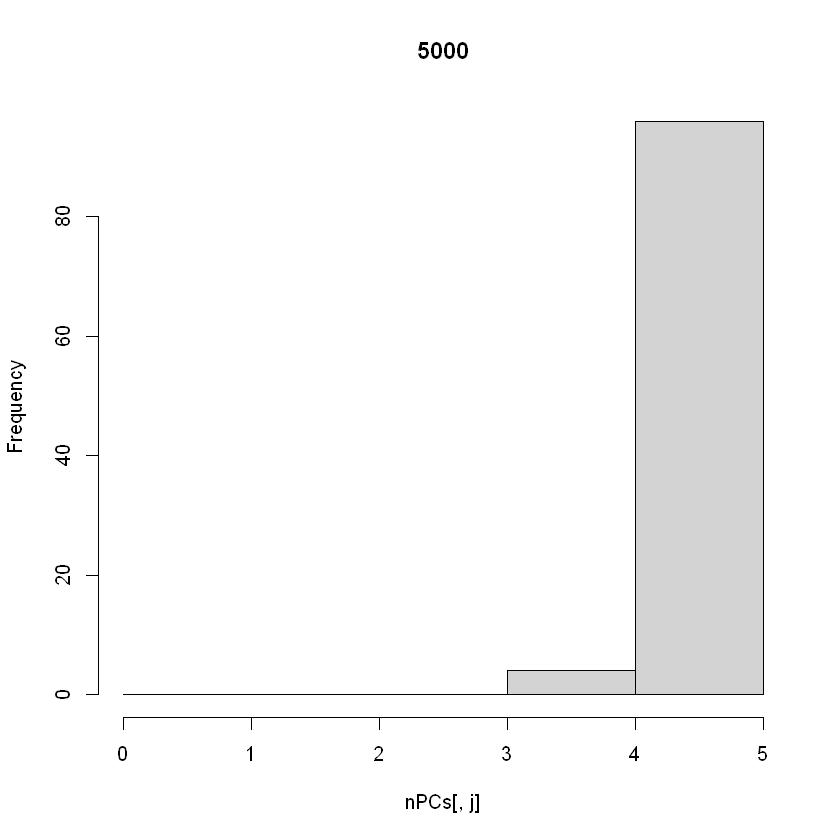

In [41]:
for (j in 1:length(p_arr)){
    hist(nPCs[,j], main = p_arr[j], breaks=c(0,1,2,3,4,5))
}

When the error comes from exponential distribution instead of the normal distribution the trend stays the same, but the average number of selected PCs for each $p$ is higher, starting from around 3 for $p=100$, ending at selecting all 5 for $p=5000$.

### Cauchy distribution

In [43]:
nPCs <- matrix(rep(0, reps*length(p_arr)), reps, length(p_arr));

In [44]:
for (j in 1:length(p_arr)){
    p <- p_arr[j];
    F <- matrix(rnorm(n*k,0,1),n,k);
    W <- t(t(matrix(rnorm(p*k,0,1),p,k)) * ((k+1)-(1:k)));
    for (i in 1:reps){
        E <- matrix(rcauchy(n*p),n,p);
        X <- F %*% t(W) + E;
        wyn <- pesel(X);
        nPCs[i,j] <- wyn$nPCs;
    }
}

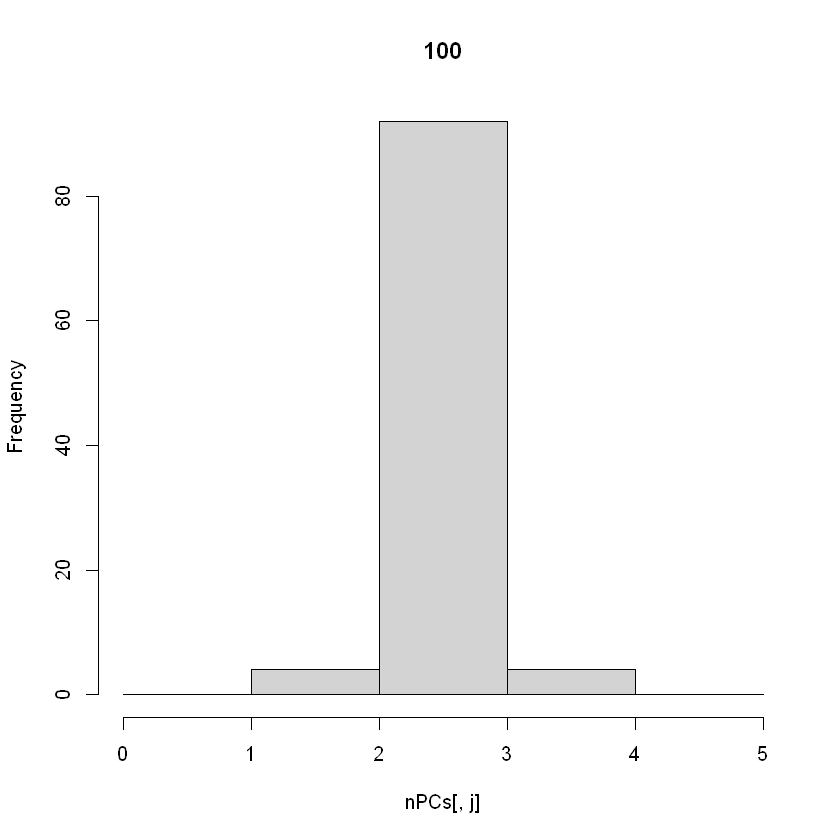

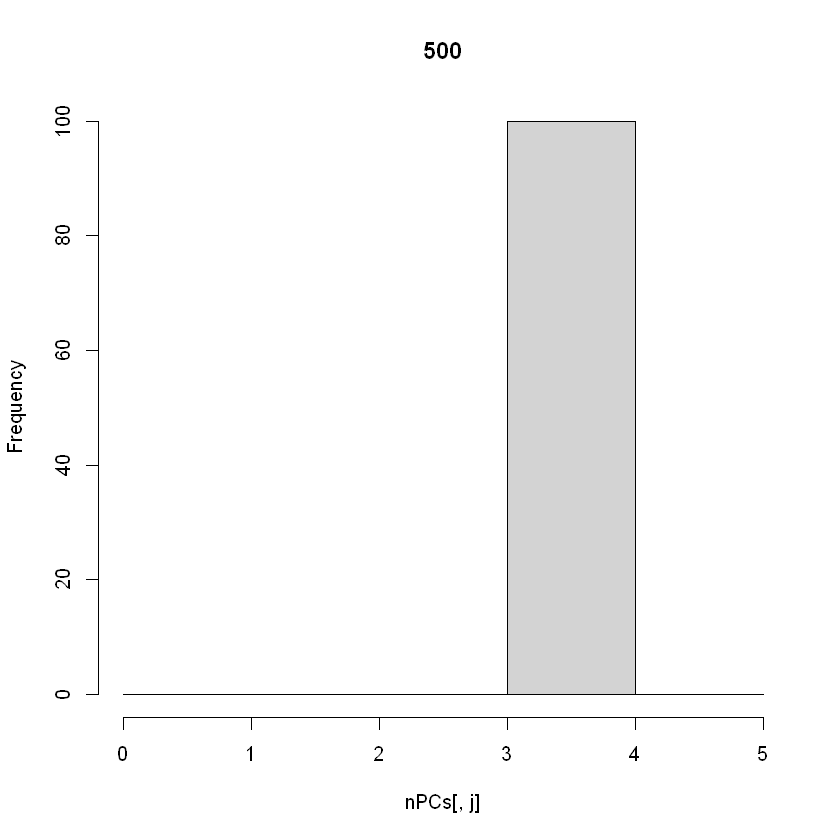

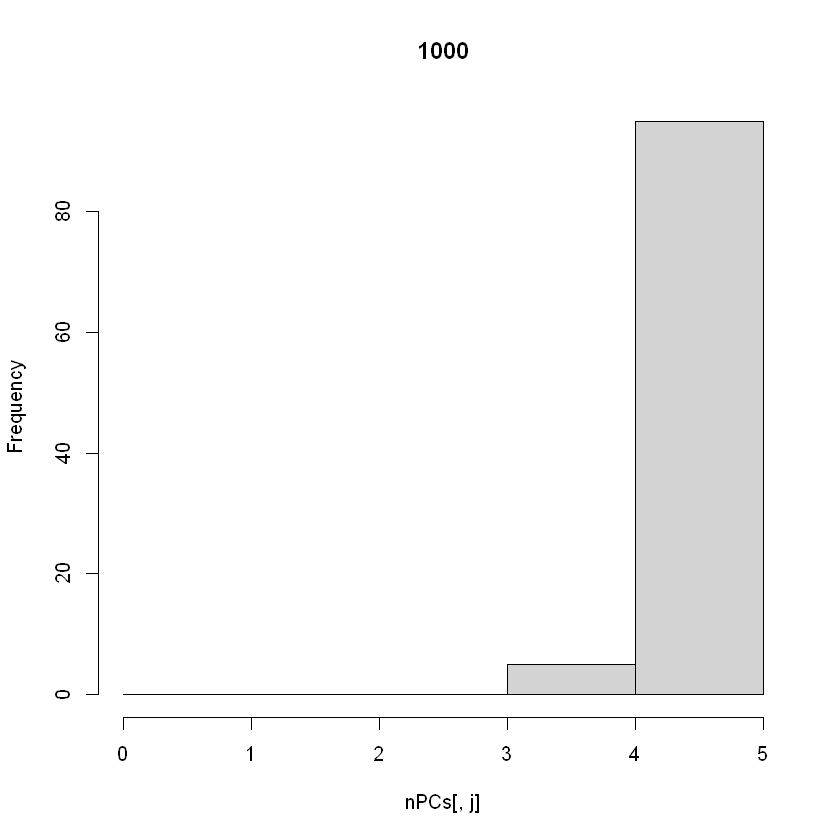

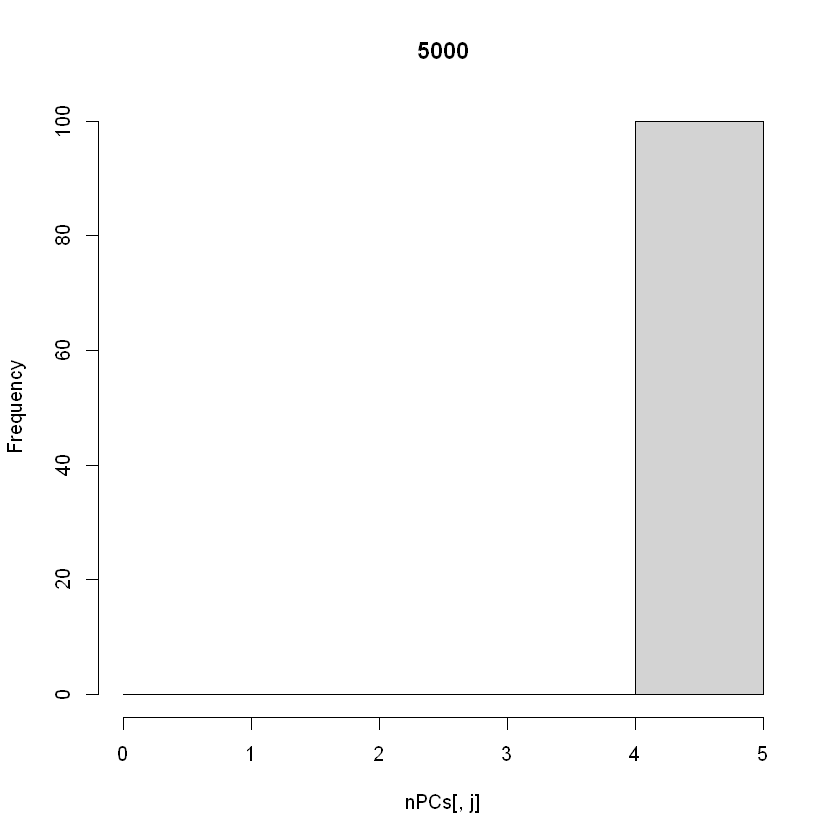

In [45]:
for (j in 1:length(p_arr)){
    hist(nPCs[,j], main = p_arr[j], breaks=c(0,1,2,3,4,5))
}

When the error comes from the Cauchy distribution the number of selected PCs is even higher, ale we can almost select all 5 PC's when $p=1000$.

## 4. 
For $n = 50$, $p = 800$ and $K = 4$ generate 100 independent replicates of the design matrix $X_{n \times p}$ according to the formula

$X = [X^1, \cdots, X^K]$


where each $X^i$ is of the dimension $n \times 200$ and is obtained as

$X^i = F^i(W^{i})^T + E^i$


$F^i_{n \times 3}: \quad \text{for} \, j \in \{1, \cdots , 3\} F^i_{.j} \sim N(0, I_{n \times n})$


$W^i_{200 \times 3}: \quad W^i_{.j} = (4 − j)N(0, I_{p \times p})$


$E^i_{n \times 200}: \quad E^i_{uj} \sim N(0, \sigma = 1)$


Then generate the vector of response variable according to the formula

$Y = F \beta + Z$ ,

where $F = [F^1, \cdots , F^K]$, $\, \beta = [0, \frac{1}{2}, \frac{1}{2}, 0, \frac{1}{2}, \frac{1}{2}, 0, 0, 0, 0, 0, 0]$.

a) Use PESEL to estimate the rank of X and calculate all important principal components of X. Draw the histogram of the estimated dimension.

b) Use varclust to cluster the columns of X. Draw histogram of the number of selected clusters, estimated dimensions of the clusters and values of ARI, Integration and Acontamination.

library(pesel);c) Fit the predictive model for Y based on X matrix using
* Lasso with cross-validation
* Adaptive LASSO
* Ridge regression with cross-validation
* Least squares regression using principal components calculated in a) - use the model with all calculated PCs as well as the model with PCs selected by mBIC2
* Least squares regression using all PCs calculated in b) - use the model with all calculated PCs as well as the model with PCs selected by mBIC2

For all these methods draw histograms of $SSE(\hat{\mu}) = ||\hat{\mu} − \mu||^2$, where $\mu = E(Y)$.

In [1]:
library(pesel);
library(varclust);
library(glmnet);
library('bigstep');

Warning message:
"package 'varclust' was built under R version 4.0.5"
Loading required package: Matrix

Loaded glmnet 4.1-1



In [2]:
n <- 50
p <- 800
K <- 4
p_i <- p/K
k <- 3

In [3]:
F_i <- array(rep(0,n*k*K),c(K,n,k))
for (i in 1:K){
    F_i[i,,] <- matrix(rnorm(n*k,0,1),n,k);
}

In [4]:
W_i <- array(rep(0,p_i*k*K),c(K,p_i,k))
for (i in 1:K){
    W_i[i,,] <- t(t(matrix(rnorm(p_i*k,0,1),p_i,k)) * ((k+1)-(1:k)));
}

In [5]:
E_i <- array(rep(0,p_i*n*K),c(K,n,p_i))
for (i in 1:K){
    E_i[i,,] <- matrix(rnorm(n*p_i,0,1),n,p_i);
}

In [6]:
X_i <- array(rep(0,n*p),c(K,n,p_i))
for (i in 1:K){
    X_i[i,,] <- F_i[i,,] %*% t(W_i[i,,]) + E_i[i,,];
}

In [7]:
X <- matrix(rep(0,n*p),n,p)
for (i in 1:K){
    X[,((i-1)*p_i+1):(i*p_i)] <- X_i[i,,]
}

In [8]:
F <- matrix(rep(0,n*K*k),n,(K*k))
for (i in 1:K){
    F[,((i-1)*k+1):(i*k)] <- F_i[i,,]
}

In [9]:
Betas <- c(0, 0.5, 0.5, 0, 0.5, 0.5, 0, 0, 0, 0, 0, 0)

In [10]:
labels = c(rep(1,p_i), rep(2,p_i), rep(3,p_i), rep(4,p_i))

In [11]:
Z <- rnorm(n,0,1/sqrt(n))

In [12]:
Y <- F %*% Betas + Z

In [13]:
reps <- 100

In [14]:
ARI <- function(preds, labels){
    n <- length(labels);
    a <- 0;
    b <- 0;
    c <- 0;
    d <- 0;
    for (i in 1:(n-1)){
        for (j in (i+1):n){
            if (preds[i]==preds[j]){
                if (labels[i]==labels[j]){
                    a <- a+1;
                } else{
                    b <- b+1
                }
            } else{
                if (labels[i]==labels[j]){
                    c <- c+1;
                } else{
                    d <- d+1;
                }
            }
        }
    }
    binom <- choose(n,2);
    ARI <- (binom*(a+d) - ((a+b)*(a+c) + (b+d)*(c+d)))/(binom^2 - ((a+b)*(a+c) + (b+d)*(c+d)))
    return(ARI)
}

In [15]:
Int <- function(A_j, B){
    m <- max(B);
    res <- 0;
    for (j in 1:m){
        res <- max(res, length(intersect(A_j, which(B==j))));
    }
    res <- res/length(A_j);
    return(res)
}
Integrat <- function(preds, labels){
    n <- max(preds);
    res <- 0;
    for (i in 1:n){
        res <- res + Int(which(preds==i), labels);
    }
    res <- res/n;
    return(res)
}

In [16]:
Ac <- function(A_j, B){
    m <- max(B);
    res <- 0;
    B_k_count <- 0;
    for (j in 1:m){
        temp <- length(intersect(A_j, which(B==j)));
        if (temp>res){
            res <- temp;
            B_k_count <- length(which(B==j));
        }
    }
    res <- res/B_k_count;
    return(res)
}
Acount <- function(preds, labels){
    n <- max(preds);
    res <- 0;
    for (i in 1:n){
        res <- res + Ac(which(preds==i), labels);
    }
    res <- res/n;
    return(res)
}

In [17]:
nPCs_pesel <- rep(0, reps);
nClusters <- rep(0, reps);
dimVarclust <- rep(0, reps);
ARIs <- rep(0, reps);
Integrats <- rep(0, reps);
Acounts <- rep(0, reps);
SSE_Lasso <- rep(0, reps);
SSE_RR <- rep(0, reps);
SSE_ALasso <- rep(0, reps);
SSE_pcls_pesel <- rep(0, reps);
SSE_pcls_pesel_mbic2 <- rep(0, reps);
SSE_pcls_varclust <- rep(0, reps);
SSE_pcls_varclust_mbic2 <- rep(0, reps);

In [18]:
lambda_alasso <- qnorm(1-0.1/p);
EY <-  F %*% Betas;
for (r in 1:reps){
    
    # data
    for (i in 1:K){
        E_i[i,,] <- matrix(rnorm(n*p_i,0,1),n,p_i);
        X_i[i,,] <- F_i[i,,] %*% t(W_i[i,,]) + E_i[i,,];
        X[,((i-1)*p_i+1):(i*p_i)] <- X_i[i,,];
        F[,((i-1)*k+1):(i*k)] <- F_i[i,,]
    }
    
    Z <- rnorm(n,0,1/sqrt(n));
    Y <- F %*% Betas + Z;
    
    
    # a) PESEL
    wyn <- pesel(X, npc.max=20);
    nPCs_pesel[r] <- wyn$nPCs;
    eig <- eigen(t(X) %*% X)
    F_eig <- X %*% eig$vectors[,1:wyn$nPCs]
    
    
    # b) varclust
    varc <- mlcc.bic(X, numb.clusters = 1:10, numb.runs = 5, max.iter = 15);
    nClusters[r] <- varc$nClusters;
    dimVarclust[r] <- mean(as.numeric(varc$subspacesDimensions));
    ARIs[r] <- ARI(varc$segmentation, labels);
    Integrats[r] <- Integrat(varc$segmentation, labels);
    Acounts[r] <-Acount(varc$segmentation, labels);
    
    
    # c)
    # Lasso
    obj1 <- cv.glmnet(X, Y, alpha=1, intercept=FALSE, standardize=FALSE);
    betas_lasso_ <- coefficients(obj1, s='lambda.min')[2:(p+1),1];
    lasso_indxs <- which(abs(betas_lasso_)>0);
    SSE_Lasso[r] <- sum((X %*% betas_lasso_ - EY)^2);
    
    # RR
    obj2 <- cv.glmnet(X, Y, alpha=0, intercept=FALSE, standardize=FALSE);
    betas_ridge_ <- coefficients(obj2, s='lambda.min')[2:(p+1),1];
    SSE_RR[r] <- sum((X %*% betas_ridge_ - EY)^2);
    
    # ALasso
    Lasso_RSS <- sum((Y- X%*%betas_lasso_)^2)
    X_ADLasso2 <- X[,lasso_indxs];
    betas_adlasso2_ <- betas_lasso_[lasso_indxs];
    sigma_lassoCV <- sqrt(Lasso_RSS/(n-length(lasso_indxs)));
    W_ADLasso_2<-abs(betas_adlasso2_)/sigma_lassoCV;
    X_ADLasso2_temp <- sweep(X_ADLasso2, 2, W_ADLasso_2, '*');
    obj3 <- glmnet(X_ADLasso2_temp, Y, intercept=FALSE, alpha=1, standardize=FALSE, lambda=sigma_lassoCV*lambda_alasso/n);
    betas_adlasso2_2 <- coefficients(obj3)[2:(length(lasso_indxs)+1)] * W_ADLasso_2;
    betas_adlasso2_3 <- rep(0,p);
    betas_adlasso2_3[lasso_indxs] <- betas_adlasso2_2;
    SSE_ALasso[r] <- sum((X %*% betas_adlasso2_3 - EY)^2);
    
    # PCLS + PESEL
    obj4 <- lm(Y~F_eig-1);
    betas_pcls_pesel_ <- obj4$coefficients;
    SSE_pcls_pesel[r] <- sum((F_eig %*% betas_pcls_pesel_ - EY)^2);
    
    # PCLS + PESEL + mBIC2
    dat<-prepare_data(Y, F_eig, verbose = FALSE);
    obj5<-stepwise(dat, crit='mbic2', maxf=p);
    selected<-as.numeric(obj5$model);
    betaolsmBIC<-rep(0,wyn$nPCs);
    if (length(selected)>0){
        F_mBIC2<-F_eig[,selected];
        betaolsmBIC[selected] = summary(lm(Y ~ F_mBIC2-1))$coef[,1];
    }
    SSE_pcls_pesel_mbic2[r] <- sum((F_eig %*% betaolsmBIC - EY)^2);
    
    # PCLS + varclust
    n_dim_varclust <- sum(as.numeric(varc$subspacesDimensions));
    F_varclust <- matrix(rep(0, n*n_dim_varclust), n, n_dim_varclust);
    temp_dim <- 1;
    for (c in 1:varc$nClusters){
        X_temp <- X[,which(varc$segmentation==c)];
        dim_c <- as.numeric(varc$subspacesDimensions)[c];
        eig <- eigen(t(X_temp) %*% X_temp)
        F_varclust[, temp_dim:(temp_dim+dim_c-1)] <- X_temp %*% eig$vectors[,1:dim_c];
        temp_dim <- temp_dim + dim_c;
    }
    obj6 <- lm(Y~F_varclust-1);
    betas_pcls_varclust_ <- obj6$coefficients;
    SSE_pcls_varclust[r] <- sum((F_varclust %*% betas_pcls_varclust_ - EY)^2);
    
    # PCLS + varclust + mBIC2
    dat<-prepare_data(Y, F_varclust, verbose = FALSE);
    obj7<-stepwise(dat, crit='mbic2', maxf=p);
    selected<-as.numeric(obj7$model);
    betaolsmBIC<-rep(0,n_dim_varclust);
    if (length(selected)>0){
        F_mBIC2<-F_varclust[,selected];
        betaolsmBIC[selected] = summary(lm(Y ~ F_mBIC2-1))$coef[,1];
    }
    SSE_pcls_varclust_mbic2[r] <- sum((F_varclust %*% betaolsmBIC - EY)^2);
}

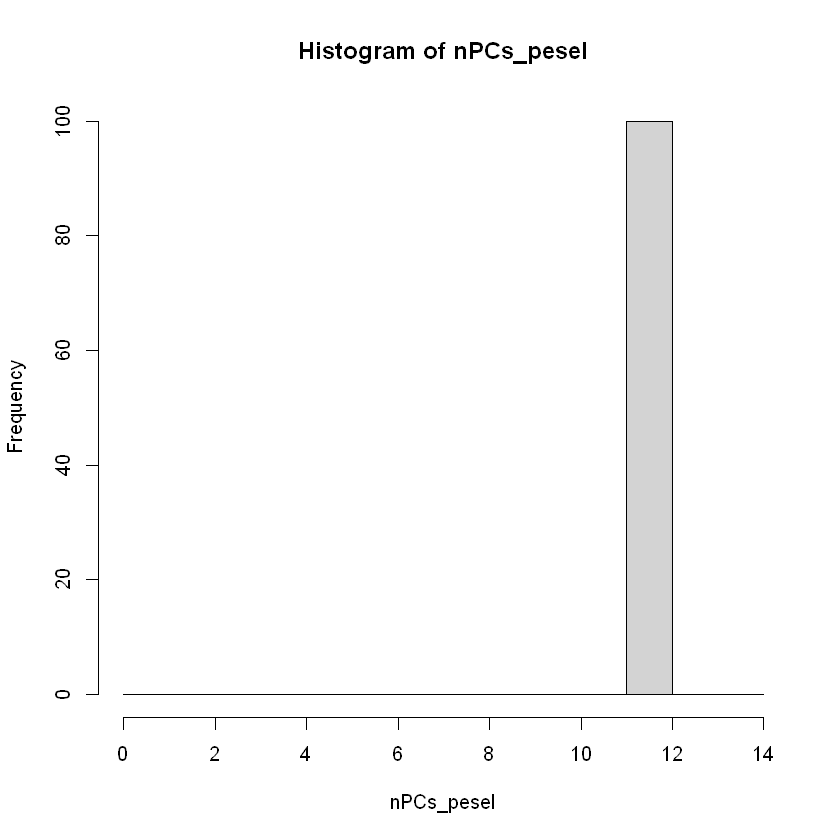

In [19]:
hist(nPCs_pesel, breaks=0:14)

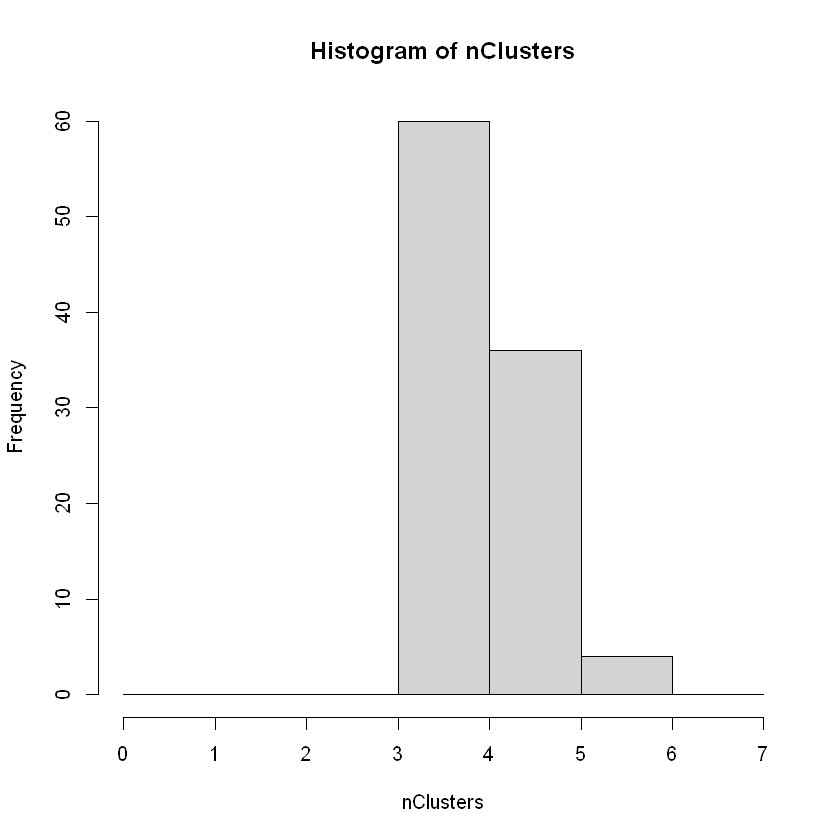

In [20]:
hist(nClusters, breaks=0:7)

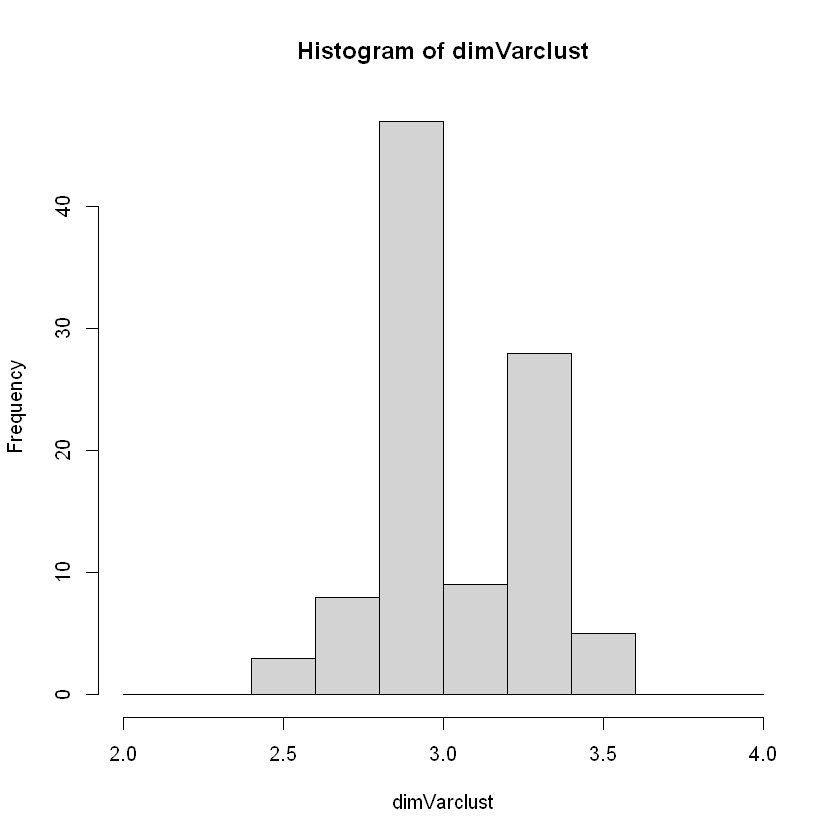

In [21]:
hist(dimVarclust, breaks=0:10/5 + 2)

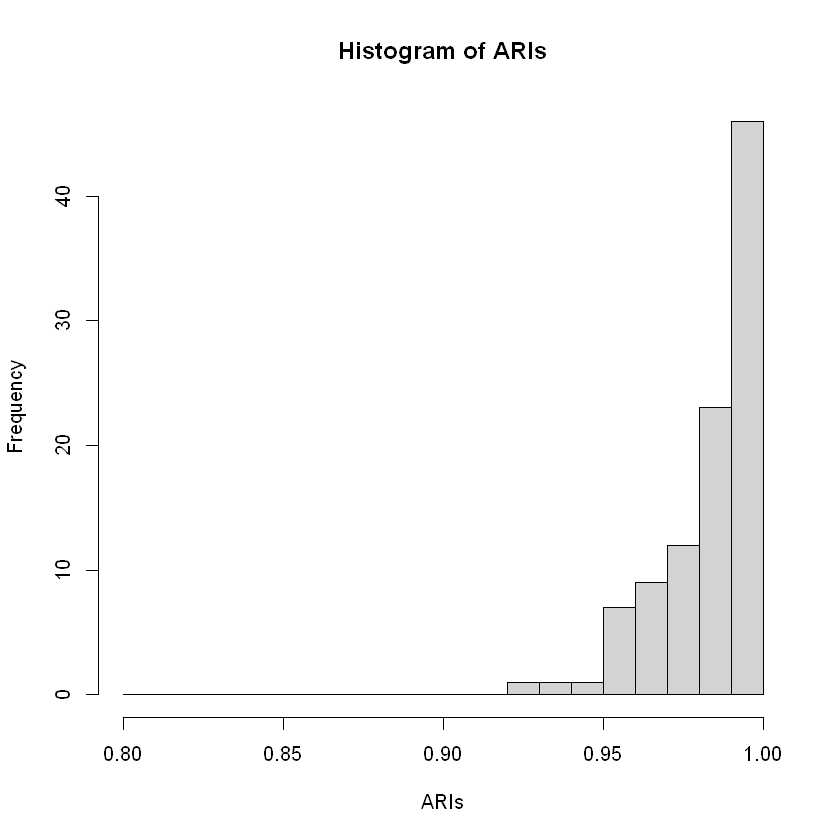

In [22]:
hist(ARIs, breaks=0:20/100 + 0.80)

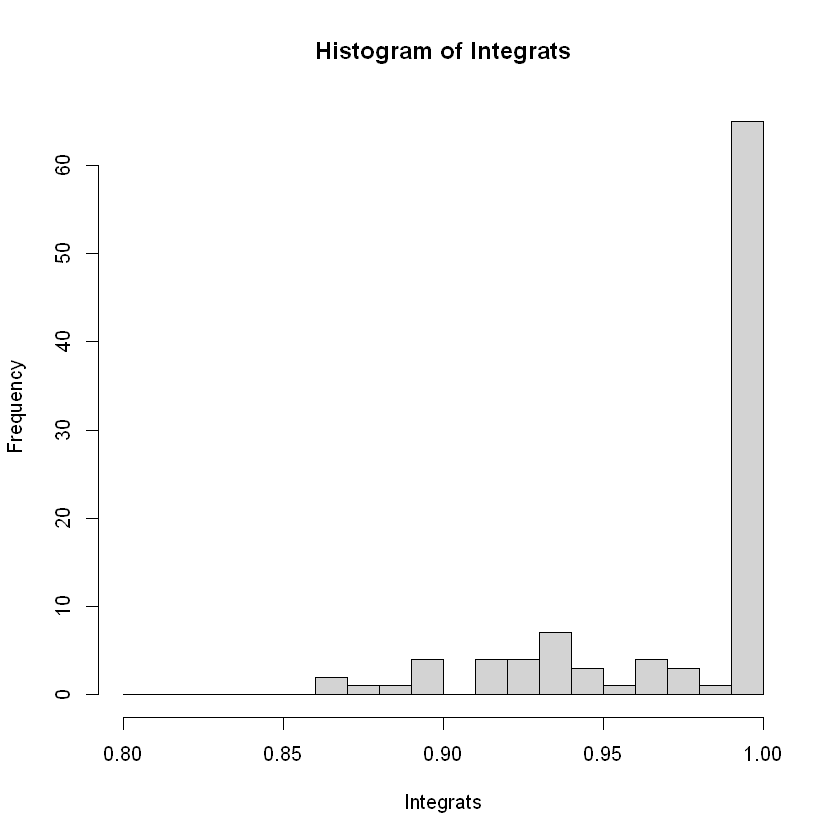

In [23]:
hist(Integrats, breaks=0:20/100 + 0.80)

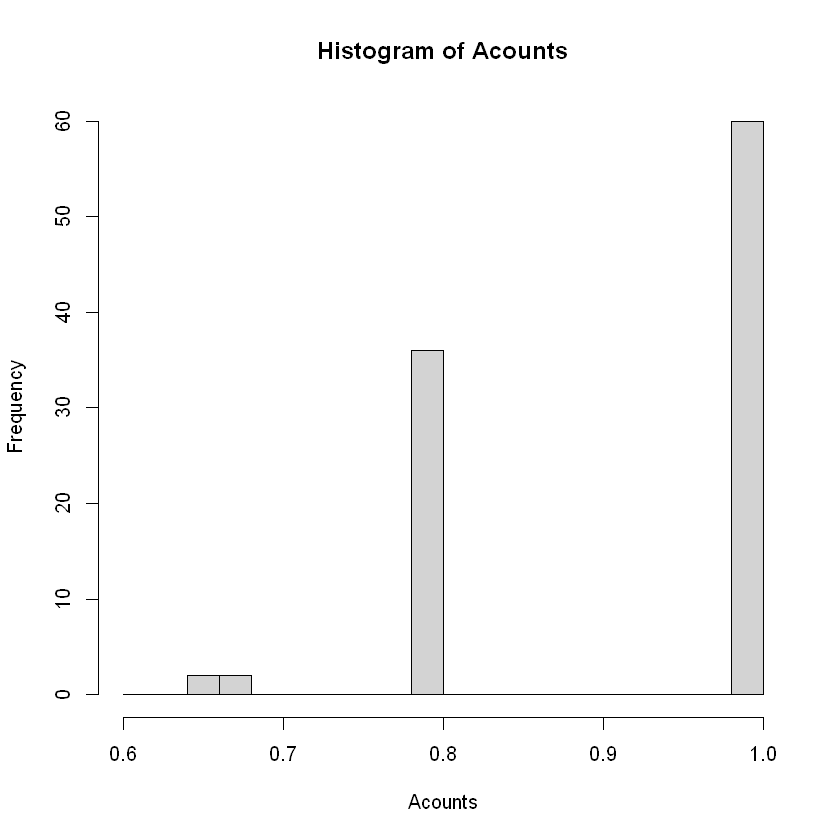

In [24]:
hist(Acounts, breaks=0:20/50 + 0.6)

In [28]:
df = data.frame(
    c1<-round(mean(SSE_Lasso),4),
    c2<-round(mean(SSE_RR),4),
    c3<-round(mean(SSE_ALasso),4),
    c4<-round(mean(SSE_pcls_pesel),4),
    c5<-round(mean(SSE_pcls_pesel_mbic2),4),
    c6<-round(mean(SSE_pcls_varclust),4),
    c7<-round(mean(SSE_pcls_varclust_mbic2),4)
);
colnames(df) <- c('Lasso', 'RR', 'AdLasso', 'PC-LS-P', 'PC-LS-P-mBIC', 'PC-LS-V', 'PC-LS-V-mBIC');
rownames(df) <- c('SSE(mu)');
print(df)

         Lasso    RR AdLasso PC-LS-P PC-LS-P-mBIC PC-LS-V PC-LS-V-mBIC
SSE(mu) 0.6177 0.859  0.9503  0.3622        6.439  0.3841       0.3038


In each iteration, PESEL chose all 12 PCs.

Most of the time, Varclust creates 4 clusters, but sometimes it adds one or two more clusters. The average dimension is usually near 3.

All 3 scores show that most of the time our clustering is really good and the score value is near 1. But sometimes we can spot some outliers, especially looking at Acontamination score.

Lasso (both standard and Adaptive one) and the Ridge regression let us describe the Y variable a bit, but the results are not that good as while using PCs.
Using the standard least square method on the principal components based on PESEL results is getting quite good results, but limiting the number of variables using mBIC2 leads to a significant increase of the error. 
Calculating the principal component from each cluster (got from Varclust) separately leads to similar results to the previous method, but this time we can use mBIC2 to reduce unnecessary variables, which leads to results improvment.